In [11]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To show plots inline
%matplotlib inline


In [12]:
# Load the dataset
df = pd.read_csv('garments_worker_productivity.csv')

# Display first 5 rows
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [14]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [15]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
df['department'].value_counts()

In [ ]:
df.corr(numeric_only=True)['actual_productivity'].sort_values(ascending=False)

In [ ]:
df['wip'] = df['wip'].fillna(df['wip'].mean())

In [ ]:
df.isnull().sum()

In [ ]:
df = pd.get_dummies(df, columns=['quarter', 'department', 'day'], drop_first=True)

In [ ]:
df = df.drop('date', axis=1)

In [ ]:
# Drop columns that are not useful
df = df.drop(['date', 'wip'], axis=1)  # Drop 'wip' and 'date'

# Encode categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=['quarter', 'department', 'day'], drop_first=True)

# Split into input features and target
X = df.drop('actual_productivity', axis=1)
y = df['actual_productivity']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Splitting the dataset into input features and target variable
X = df.drop('actual_productivity', axis=1)
y = df['actual_productivity']

In [16]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('actual_productivity', axis=1)
y = df['actual_productivity']

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_test_lr = model_lr.predict(X_test)

mae = mean_absolute_error(y_test, pred_test_lr)
mse = mean_squared_error(y_test, pred_test_lr)
r2 = r2_score(y_test, pred_test_lr)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)

In [24]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')


📊 Linear Regression
MAE: 0.043473369160004466
MSE: 0.004133703766880473
R² Score: 0.8012302992781943

🌲 Random Forest
MAE: 0.03256030332244601
MSE: 0.003518604473409515
R² Score: 0.8308074314028998

⚡ XGBoost
MAE: 0.03147297064763724
MSE: 0.003068034113872027
R² Score: 0.852473167645768


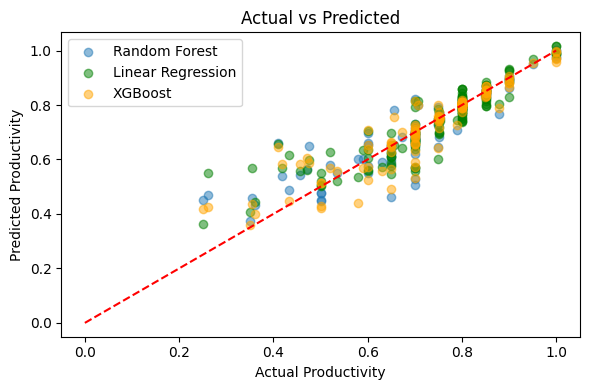

In [38]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset
# df = pd.read_csv("dataset/garments_worker_productivity.csv")

# Clean and preprocess
df.dropna(inplace=True)  # Remove rows with missing values
df.drop('date', axis=1, inplace=True)  # Drop date column (string type)
df = pd.get_dummies(df, columns=['quarter', 'department', 'day'], drop_first=True)  # Encode categoricals

# Split features and target
X = df.drop('actual_productivity', axis=1)
y = df['actual_productivity']

# Ensure all data is numeric
X = X.astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# 📌 Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

print("\n📊 Linear Regression")
print("MAE:", mean_absolute_error(y_test, pred_lr))
print("MSE:", mean_squared_error(y_test, pred_lr))
print("R² Score:", r2_score(y_test, pred_lr))

# -------------------------
# 🌲 Random Forest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

print("\n🌲 Random Forest")
print("MAE:", mean_absolute_error(y_test, pred_rf))
print("MSE:", mean_squared_error(y_test, pred_rf))
print("R² Score:", r2_score(y_test, pred_rf))

# -------------------------
# ⚡ XGBoost
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)

print("\n⚡ XGBoost")
print("MAE:", mean_absolute_error(y_test, pred_xgb))
print("MSE:", mean_squared_error(y_test, pred_xgb))
print("R² Score:", r2_score(y_test, pred_xgb))

# -------------------------
# Optional: Visualization
plt.figure(figsize=(6, 4))
plt.scatter(y_test, pred_rf, alpha=0.5, label="Random Forest")
plt.scatter(y_test, pred_lr, alpha=0.5, label="Linear Regression", color='green')
plt.scatter(y_test, pred_xgb, alpha=0.5, label="XGBoost", color='orange')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Actual Productivity")
plt.ylabel("Predicted Productivity")
plt.title("Actual vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()


In [39]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make sure input is correct shape
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values.ravel()
y_test_np = y_test.values.ravel()

# Initialize and train
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train_np, y_train_np)

# Predict and evaluate
pred_test_xgb = model_xgb.predict(X_test_np)

mae_xgb = mean_absolute_error(y_test_np, pred_test_xgb)
mse_xgb = mean_squared_error(y_test_np, pred_test_xgb)
r2_xgb = r2_score(y_test_np, pred_test_xgb)

# Print results
print("📌 XGBoost Results")
print("Mean Absolute Error:", mae_xgb)
print("Mean Squared Error:", mse_xgb)
print("R² Score:", r2_xgb)


📌 XGBoost Results
Mean Absolute Error: 0.03147297064763724
Mean Squared Error: 0.003068034113872027
R² Score: 0.852473167645768


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Predict
pred_test_rf = model_rf.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, pred_test_rf)
mse_rf = mean_squared_error(y_test, pred_test_rf)
r2_rf = r2_score(y_test, pred_test_rf)

print("🌲 Random Forest Results")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R² Score:", r2_rf)

🌲 Random Forest Results
Mean Absolute Error: 0.06888115507310723
Mean Squared Error: 0.011903038094365572
R² Score: 0.551716294086015


In [27]:
import pickle

# Save the best-performing model
with open('gwp.pkl', 'wb') as f:
    pickle.dump(model_rf, f)

In [26]:
features = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time',
            'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']
X = df[features]
y = df['actual_productivity']

# Handle missing values (e.g., wip has NaNs)
X = X.fillna(0)


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Save model to a file
import joblib
joblib.dump(model_rf, 'model_rf_10features.pkl')

['model_rf_10features.pkl']